In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
data=pd.read_excel('logistic_data_v1.xlsx')

In [6]:
data.head()

,K(MPa),epsilon_0,n,Umin(mm),Fumin(N),Uint(mm),FUint(N),UFmax(mm),Fmax(N),pente1,pente2
0,400,0.001,0.15,0.24887,1085.258917,2.089109,1910.439714,10.572964,1943.394311,448.409721,3.884389
1,550,0.001,0.15,0.24887,1472.532116,2.065902,2625.373505,10.616330,2671.305527,634.464011,5.371898
2,700,0.001,0.15,0.24887,1865.863247,2.252145,3425.908793,12.616264,3395.272157,778.747499,-2.956029
3,850,0.001,0.15,0.24887,2246.508175,2.172331,4051.135133,10.790882,4125.089352,938.218597,8.580818
4,1000,0.001,0.15,0.24887,2619.809746,2.291147,4867.149496,12.508611,4847.925275,1100.408934,-1.881506


- K (MPa): Module d'élasticité : 
-  Epsilon_0 (sans unité): Déformation initiale 
-  N: Exposant de durcissement
- Umin (mm) - Déplacement minimal 
-  Fmin (N) - Force minimale 
-  Uint(mm) - Déplacement à l'intersection 
-  Fint (N) - Force à l'intersection 
- Umax (mm) - Déplacement à la force maximale 
- Fmax (N) - Force maximale 
- pente1 - Première pente 

In [7]:
data.describe()

,K(MPa),epsilon_0,n,Umin(mm),Fumin(N),Uint(mm),FUint(N),UFmax(mm),Fmax(N),pente1,pente2
count,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,700.000000,0.010500,0.250000,0.24887,1686.817117,3.156758,2823.403247,15.675772,2950.022484,410.168408,8.701571
std,212.985688,0.006745,0.070995,0.00000,824.906499,0.504147,966.277885,2.928405,951.892904,211.657965,10.823105
min,400.000000,0.001000,0.150000,0.24887,306.886617,2.065902,1180.755369,9.331278,1402.041525,124.045802,-5.463657
25%,550.000000,0.005750,0.200000,0.24887,1078.772743,2.725370,1990.127790,14.701039,2125.739888,262.487389,-0.698125
50%,700.000000,0.010500,0.250000,0.24887,1559.544575,3.206926,2717.617455,17.280532,2916.214984,359.308451,6.031180
75%,850.000000,0.015250,0.300000,0.24887,2155.213284,3.541056,3462.724354,17.849251,3626.775162,500.268954,15.892552
max,1000.000000,0.020000,0.350000,0.24887,4113.787134,4.041993,4969.044886,18.040558,4945.071548,1100.408934,50.616059


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   K(MPa)     125 non-null    int64  
 1   epsilon_0  125 non-null    float64
 2   n          125 non-null    float64
 3   Umin(mm)   125 non-null    float64
 4   Fumin(N)   125 non-null    float64
 5   Uint(mm)   125 non-null    float64
 6   FUint(N)   125 non-null    float64
 7   UFmax(mm)  125 non-null    float64
 8   Fmax(N)    125 non-null    float64
 9   pente1     125 non-null    float64
 10  pente2     125 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 10.9 KB


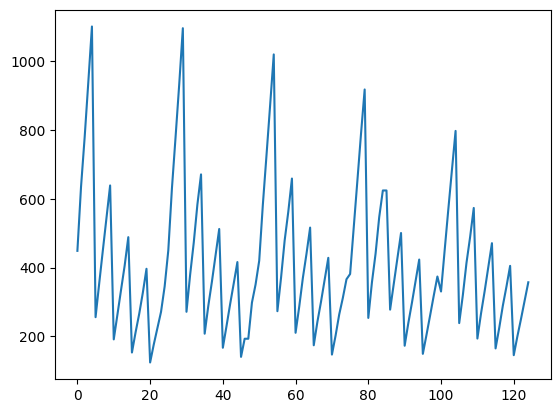

In [9]:
plt.plot(data['pente1'])

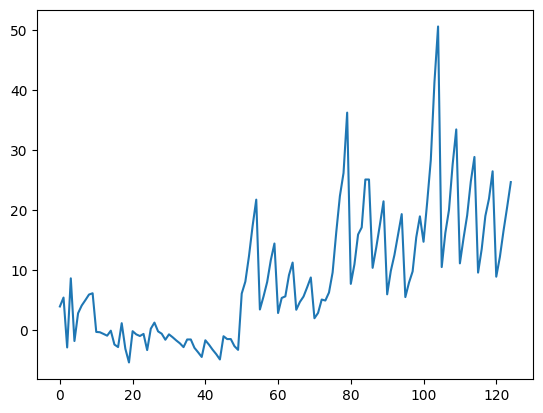

In [10]:
plt.plot(data['pente2'])

In [12]:
X = data.drop(['K(MPa)', 'epsilon_0', 'n'], axis=1)  
y_K = data['K(MPa)']  
y_epsilon_0 = data['epsilon_0']  
y_n = data['n'] 

normalize data

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler



In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

split on each y to predict each y alone

In [16]:
X_train, X_test, y_train_K, y_test_K = train_test_split(X_scaled, y_K, test_size=0.2, random_state=42)
_, _, y_train_epsilon_0, y_test_epsilon_0 = train_test_split(X_scaled, y_epsilon_0, test_size=0.2, random_state=42)
_, _, y_train_n, y_test_n = train_test_split(X_scaled, y_n, test_size=0.2, random_state=42)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score

For the evaluation metrics : mse and r2 

In [18]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f'{model_name} - Mean Squared Error: {mse}, R²: {r2}')
    return mse, r2

In [19]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C
from xgboost import XGBRegressor

linear regression

In [20]:
lr = LinearRegression()
lr.fit(X_train, y_train_K)
y_pred_K = lr.predict(X_test)
evaluate_model(y_test_K, y_pred_K, "Linear Regression")

Linear Regression - Mean Squared Error: 993.0802567556427, R²: 0.9716780670557938


(993.0802567556427, 0.9716780670557938)

In [24]:
svr = SVR(kernel='rbf') 
svr.fit(X_train, y_train_K)
y_pred_K_svr = svr.predict(X_test)
evaluate_model(y_test_K, y_pred_K_svr, "SVR")

SVR - Mean Squared Error: 32259.046182448506, R²: 0.07999526059638074


(32259.046182448506, 0.07999526059638074)

In [25]:
svr = SVR(kernel='linear') 
svr.fit(X_train, y_train_K)
y_pred_K_svr = svr.predict(X_test)
evaluate_model(y_test_K, y_pred_K_svr, "SVR")

SVR - Mean Squared Error: 2188.6208507516644, R²: 0.9375821112607898


(2188.6208507516644, 0.9375821112607898)

RF

In [26]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train_K)
y_pred_K_rf = rf.predict(X_test)
evaluate_model(y_test_K, y_pred_K_rf, "Random Forest")

Random Forest - Mean Squared Error: 2147.4264000000003, R²: 0.9387569472963724


(2147.4264000000003, 0.9387569472963724)

xgboost

In [27]:
xgb = XGBRegressor(objective ='reg:squarederror', n_estimators=100)
xgb.fit(X_train, y_train_K)
y_pred_K_xgb = xgb.predict(X_test)
evaluate_model(y_test_K, y_pred_K_xgb, "XGBoost")

XGBoost - Mean Squared Error: 4779.54479293324, R²: 0.863690828401402


(4779.54479293324, 0.863690828401402)

In [28]:
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=1e-2)
gpr.fit(X_train, y_train_K)
y_pred_K_gpr, y_std_K_gpr = gpr.predict(X_test, return_std=True)
evaluate_model(y_test_K, y_pred_K_gpr, "Gaussian Process Regression")

Gaussian Process Regression - Mean Squared Error: 6638.18105428908, R²: 0.8106838622436379


c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


(6638.18105428908, 0.8106838622436379)

In [29]:
lr.fit(X_train, y_train_epsilon_0)
y_pred_epsilon_0 = lr.predict(X_test)
evaluate_model(y_test_epsilon_0, y_pred_epsilon_0, "Linear Regression (epsilon_0)")


Linear Regression (epsilon_0) - Mean Squared Error: 2.95890863061642e-06, R²: 0.9404329738409051


(2.95890863061642e-06, 0.9404329738409051)

In [34]:
svr.fit(X_train, y_train_epsilon_0)
y_pred_epsilon_0 = svr.predict(X_test)
evaluate_model(y_test_epsilon_0, y_pred_epsilon_0, "svm (epsilon_0)")


svm (epsilon_0) - Mean Squared Error: 5.14425e-05, R²: -0.03561046511627919


(5.14425e-05, -0.03561046511627919)

In [35]:
rf.fit(X_train, y_train_epsilon_0)
y_pred_epsilon_0 = rf.predict(X_test)
evaluate_model(y_test_epsilon_0, y_pred_epsilon_0, "rf (epsilon_0)")


rf (epsilon_0) - Mean Squared Error: 2.3057897291666736e-06, R²: 0.9535811833817828


(2.3057897291666736e-06, 0.9535811833817828)

In [36]:
xgb.fit(X_train, y_train_epsilon_0)
y_pred_epsilon_0 = xgb.predict(X_test)
evaluate_model(y_test_epsilon_0, y_pred_epsilon_0, "xgb (epsilon_0)")


xgb (epsilon_0) - Mean Squared Error: 3.7367765291216312e-06, R²: 0.9247733901081937


(3.7367765291216312e-06, 0.9247733901081937)

In [30]:
lr.fit(X_train, y_train_n)
y_pred_n = lr.predict(X_test)
evaluate_model(y_test_n, y_pred_n, "Linear Regression (n)")

Linear Regression (n) - Mean Squared Error: 0.00022932781902249076, R²: 0.9558984963418287


(0.00022932781902249076, 0.9558984963418287)

In [37]:
rf.fit(X_train, y_train_n)
y_pred_n = rf.predict(X_test)
evaluate_model(y_test_n, y_pred_n, "rf (n)")

rf (n) - Mean Squared Error: 1.3240000000000005e-05, R²: 0.9974538461538461


(1.3240000000000005e-05, 0.9974538461538461)

In [40]:
xgb.fit(X_train, y_train_n)
y_pred_n = xgb.predict(X_test)
evaluate_model(y_test_n, y_pred_n, "xgb (n)")

xgb (n) - Mean Squared Error: 0.000100091474965086, R²: 0.9807516394297912


(0.000100091474965086, 0.9807516394297912)

In [41]:
svr.fit(X_train, y_train_n)
y_pred_n = svr.predict(X_test)
evaluate_model(y_test_n, y_pred_n, "svr (n)")

svr (n) - Mean Squared Error: 0.005299999999999999, R²: -0.019230769230769384


(0.005299999999999999, -0.019230769230769384)

- for n the random forest is the best model
- for epsilon 0 linear regression is the best model 


ridge +lasso + ann

In [42]:
from sklearn.linear_model import Ridge, Lasso
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


def ridge_lasso_model(X_train, X_test, y_train, y_test, alpha=1.0, model_type='ridge'):
    if model_type == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred, f"{model_type.capitalize()} Regression")
    return mse, r2

ridge_lasso_model(X_train, X_test, y_train_K, y_test_K, model_type='ridge')  # Ridge pour K
ridge_lasso_model(X_train, X_test, y_train_K, y_test_K, model_type='lasso')  # Lasso pour K

#  epsilon_0
ridge_lasso_model(X_train, X_test, y_train_epsilon_0, y_test_epsilon_0, model_type='ridge')  # Ridge pour epsilon_0
ridge_lasso_model(X_train, X_test, y_train_epsilon_0, y_test_epsilon_0, model_type='lasso')  # Lasso pour epsilon_0

#  pour n
ridge_lasso_model(X_train, X_test, y_train_n, y_test_n, model_type='ridge')  # Ridge pour n
ridge_lasso_model(X_train, X_test, y_train_n, y_test_n, model_type='lasso')  # Lasso pour n


Ridge Regression - Mean Squared Error: 1169.2480752253643, R²: 0.9666538878842869
Lasso Regression - Mean Squared Error: 1136.7440563679504, R²: 0.9675808790677632
Ridge Regression - Mean Squared Error: 2.315146680208141e-06, R²: 0.9533928146901344
Lasso Regression - Mean Squared Error: 5.243750624999998e-05, R²: -0.05564135174418583
Ridge Regression - Mean Squared Error: 0.00024074357922861597, R²: 0.9537031578406507
Lasso Regression - Mean Squared Error: 0.00535625, R²: -0.030048076923077316


(0.00535625, -0.030048076923077316)

In [43]:
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def cross_validate_model(model, X, y, cv=5):
    kfold = KFold(n_splits=cv, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    print(f"Validation croisée (MSE): {np.mean(-cv_results):.4f} ± {np.std(-cv_results):.4f}")
    return cv_results


def ridge_lasso_model_with_cv(X_train, X_test, y_train, y_test, alpha=1.0, model_type='ridge', cv=5):
    if model_type == 'ridge':
        model = Ridge(alpha=alpha)
    elif model_type == 'lasso':
        model = Lasso(alpha=alpha)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred, f"{model_type.capitalize()} Regression")

    cross_validate_model(model, X_train, y_train, cv=cv)
    
    return mse, r2

ridge_lasso_model_with_cv(X_train, X_test, y_train_K, y_test_K, model_type='ridge')
ridge_lasso_model_with_cv(X_train, X_test, y_train_epsilon_0, y_test_epsilon_0, model_type='lasso')
ridge_lasso_model_with_cv(X_train, X_test, y_train_n, y_test_n, model_type='ridge')



Ridge Regression - Mean Squared Error: 1169.2480752253643, R²: 0.9666538878842869
Validation croisée (MSE): 4165.3537 ± 6834.1068
Lasso Regression - Mean Squared Error: 5.243750624999998e-05, R²: -0.05564135174418583
Validation croisée (MSE): 0.0000 ± 0.0000
Ridge Regression - Mean Squared Error: 0.00024074357922861597, R²: 0.9537031578406507
Validation croisée (MSE): 0.0004 ± 0.0001


(0.00024074357922861597, 0.9537031578406507)

In [44]:


def build_ann_model(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(input_shape,)))  
    model.add(Dense(32, activation='relu'))  
    model.add(Dense(16, activation='relu'))  
    model.add(Dense(1))  
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model

def train_ann_model(X_train, X_test, y_train, y_test, epochs=50, batch_size=32):
    model = build_ann_model(X_train.shape[1])
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
    y_pred = model.predict(X_test)
    mse, r2 = evaluate_model(y_test, y_pred, "Artificial Neural Network")
    return mse, r2

train_ann_model(X_train, X_test, y_train_K, y_test_K)

train_ann_model(X_train, X_test, y_train_epsilon_0, y_test_epsilon_0)

train_ann_model(X_train, X_test, y_train_n, y_test_n)


c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Artificial Neural Network - Mean Squared Error: 53172.079219635474, R²: -0.5164293640096815


c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Artificial Neural Network - Mean Squared Error: 0.00030679173534402086, R²: -5.176152631257265


c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Artificial Neural Network - Mean Squared Error: 0.0007423481031082999, R²: 0.85724074940225


(0.0007423481031082999, 0.85724074940225)

better model for K

In [46]:
def plot_predictions(y_true, y_pred, title):
    """Tracer les prédictions par rapport aux valeurs réelles."""
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred, color="b", label="Predictions")
    sns.lineplot(x=y_true, y=y_true, color="r", label="True values")
    plt.title(title)
    plt.xlabel("Valeurs réelles")
    plt.ylabel("Valeurs prédites")
    plt.legend()
    plt.show()

trying to find the best params for xgboost for k

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Meilleurs hyperparamètres trouvés : {'subsample': 0.8, 'reg_lambda': 1.5, 'reg_alpha': 0.5, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
MSE pour XGBoost : 2817.0690
R² pour XGBoost : 0.9197


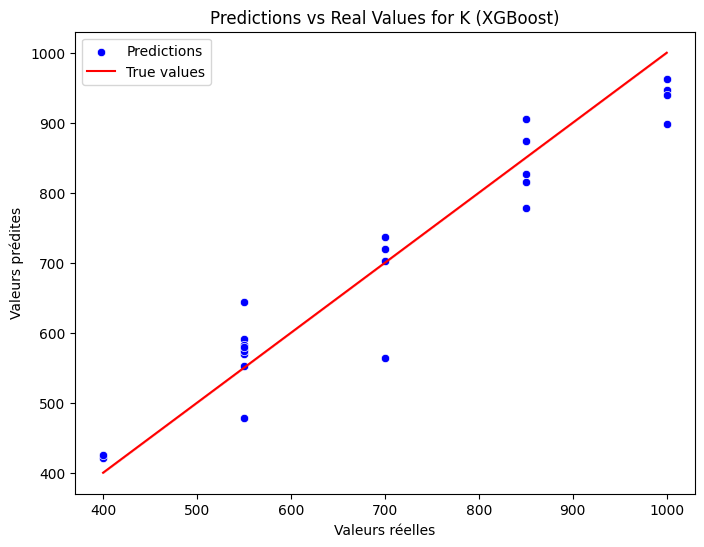

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, r2_score

xgb = XGBRegressor()

params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 0.5, 1],
    'reg_lambda': [0.5, 1, 1.5, 2]
}

random_search = RandomizedSearchCV(estimator=xgb, param_distributions=params, 
                                   n_iter=100, scoring='neg_mean_squared_error', 
                                   cv=5, verbose=2, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train_K)

print("Meilleurs hyperparamètres trouvés :", random_search.best_params_)

best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

mse = mean_squared_error(y_test_K, y_pred)
r2 = r2_score(y_test_K, y_pred)
print(f"MSE pour XGBoost : {mse:.4f}")
print(f"R² pour XGBoost : {r2:.4f}")

plot_predictions(y_test_K, y_pred, "Predictions vs Real Values for K (XGBoost)")


In [49]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Définir un noyau pour le processus gaussien
kernel = C(1.0, (1e-4, 1e1)) * RBF(1.0, (1e-4, 1e1))

# Modèle processus gaussien
gpr = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1)

# Entraîner le modèle
gpr.fit(X_train, y_train_K)

# Prédiction et évaluation
y_pred_gpr = gpr.predict(X_test)

mse_gpr = mean_squared_error(y_test_K, y_pred_gpr)
r2_gpr = r2_score(y_test_K, y_pred_gpr)

print(f"MSE pour le GPR : {mse_gpr:.4f}")
print(f"R² pour le GPR : {r2_gpr:.4f}")


MSE pour le GPR : 3374.8175
R² pour le GPR : 0.9038


c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\sklearn\gaussian_process\_gpr.py:663: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  _check_optimize_result("lbfgs", opt_res)
c:\Users\Rania\anaconda3\envs\mlops\lib\site-packages\sklearn\gaussian_process\kernels.py:455: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 10.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


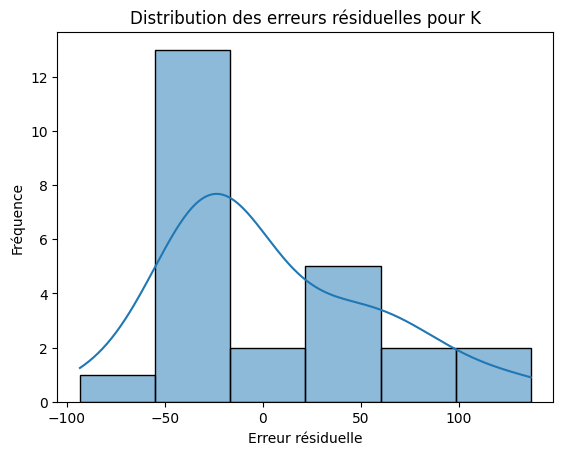

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution des erreurs
residuals = y_test_K - y_pred
sns.histplot(residuals, kde=True)
plt.title('Distribution des erreurs résiduelles pour K')
plt.xlabel('Erreur résiduelle')
plt.ylabel('Fréquence')
plt.show()
